<hr style="border:2px solid gray"> </hr>

In [1]:
# importing necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random 
import matplotlib.pyplot as plt # Plotting
%matplotlib inline

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import plot_model

In [2]:
# checking the tensorflow version
print(tf.__version__)

2.8.0


## 1) Data Preparation

In [3]:
data = "dataset.csv"

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
df.shape

(42000, 785)

In [7]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# for i in range(10):
#     plt.gray()
#     fig, ax = plt.subplots(figsize=(1,1))
#     ax.matshow(data.images[i])

In [9]:
y = df['label']
X = df.drop('label', axis=1)

In [10]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y,train_size=0.8)

In [11]:
# Now, we can choose test and validation data sizes equally as %10 of overall data for each.
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [12]:
# %80 of the data used to train the model and %10 of data used for validation and test data for each of them. 
print("X_train shape : {}".format(X_train.shape))
print("y_train shape : {}".format(y_train.shape))
print("X_valid shape : {}".format(X_valid.shape))
print("y_valid shape : {}".format(y_valid.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_test shape : {}".format(y_test.shape))

X_train shape : (33600, 784)
y_train shape : (33600,)
X_valid shape : (4200, 784)
y_valid shape : (4200,)
X_test shape : (4200, 784)
y_test shape : (4200,)


In [13]:
y_train.head()

32159    9
19505    0
6226     4
28837    8
15992    8
Name: label, dtype: int64

In [14]:
X_train = X_train/255

In [15]:
X_valid = X_valid/255

In [16]:
X_test = X_test/255

In [17]:
y_train.nunique()

10

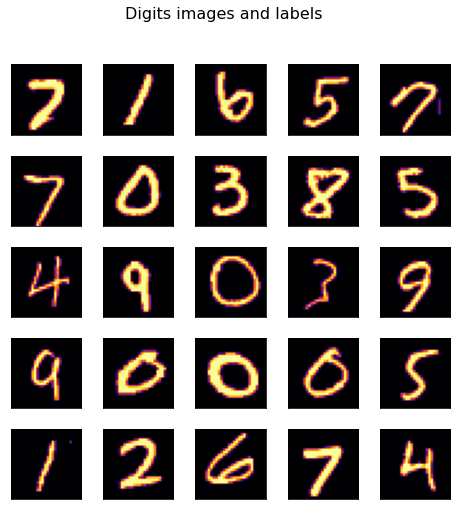

In [18]:
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, X_train.shape[0])
    ax[i].imshow(np.array(X_train.iloc[sample_n]).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
#     ax[i].set_title(y_train[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)

In [19]:
X_train = np.array(X_train)
X_valid = np.array(X_valid)

In [20]:
X_train.shape

(33600, 784)

In [21]:
X_valid.shape

(4200, 784)

In [22]:
X_test.shape

(4200, 784)

In [23]:
X_train = np.array(X_train).reshape(33600, 28, 28, 1)
X_train.shape

(33600, 28, 28, 1)

In [24]:
X_valid = np.array(X_valid).reshape(4200, 28, 28, 1)
X_valid.shape

(4200, 28, 28, 1)

In [25]:
X_test_array = np.array(X_test).reshape(4200, 28, 28, 1)
X_test_array.shape

(4200, 28, 28, 1)

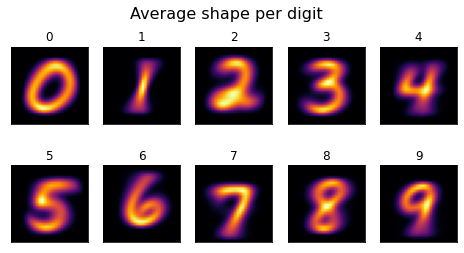

In [26]:
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
fig.suptitle('Average shape per digit', fontsize=16)

ax = ax.ravel()

for i in range(10):
    ax[i].imshow(np.array(df[df['label'] == i].drop('label', axis=1).mean()).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(i, fontsize = 12)

## 2) Creating Sequential API model

#### 2.1) Sequential Model 1 : Model With no Hidden Layer

In [27]:
model = Sequential()

In [28]:
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(10, activation="softmax"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


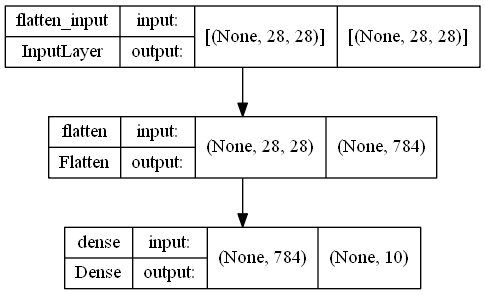

In [30]:
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [31]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [32]:
h = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1050/1050 [==============================] - 2s 1ms/step - loss: 0.9533 - accuracy: 0.7750 - val_loss: 0.6141 - val_accuracy: 0.8557
Epoch 2/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.8679 - val_loss: 0.4937 - val_accuracy: 0.8743
Epoch 3/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4550 - accuracy: 0.8815 - val_loss: 0.4446 - val_accuracy: 0.8852
Epoch 4/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.4177 - accuracy: 0.8886 - val_loss: 0.4164 - val_accuracy: 0.8890
Epoch 5/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3945 - accuracy: 0.8932 - val_loss: 0.3989 - val_accuracy: 0.8933
Epoch 6/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3782 - accuracy: 0.8969 - val_loss: 0.3839 - val_accuracy: 0.8957
Epoch 7/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3658 - accuracy: 0.9003 - val_loss: 0.3740 - val_accuracy:

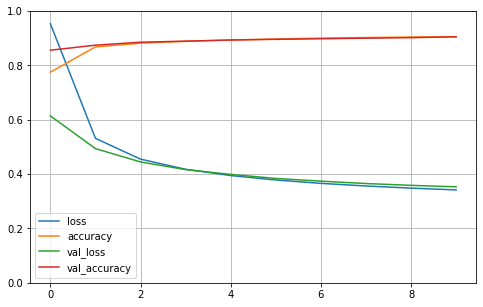

In [33]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [34]:
test_result = model.predict(X_test_array)

In [35]:
test_result = np.array(pd.DataFrame(test_result).idxmax(axis=1))

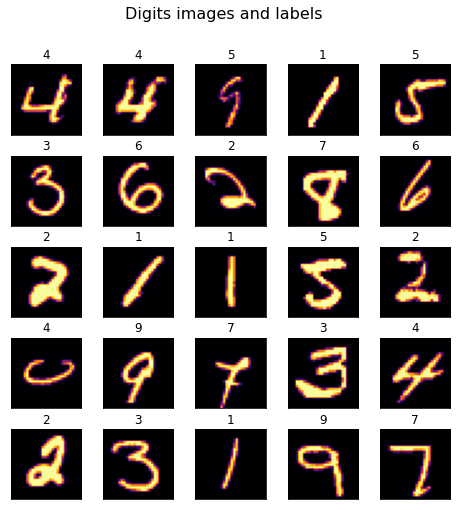

In [36]:
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, X_test.shape[0])
    ax[i].imshow(np.array(X_test.iloc[sample_n]).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(test_result[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)

In [37]:
predicted_data = pd.DataFrame({
    'ImageId': X_test.index+1,
    'Label': test_result
})

In [38]:
predicted_data

,ImageId,Label
0,39225,8
1,4225,2
2,40692,6
3,12931,3
4,12211,9
...,...,...
4195,12269,4
4196,9622,3
4197,16021,0
4198,28599,0


In [39]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test_array, y_test)
print("test loss, test acc:", results)

Evaluate on test data
132/132 [==============================] - 0s 888us/step - loss: 0.3619 - accuracy: 0.8957
test loss, test acc: [0.3618951141834259, 0.895714282989502]


<hr style="border:2px solid gray"> </hr>

#### 2.2) Sequential 2 : Model with single hidden layer

In [40]:
model = Sequential()

In [41]:
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                12560     
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


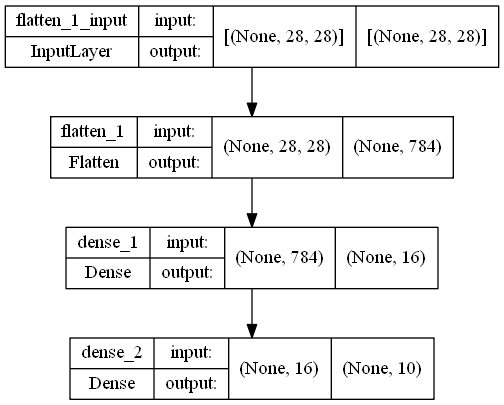

In [43]:
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [44]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [45]:
h = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1050/1050 [==============================] - 1s 1ms/step - loss: 1.9871 - accuracy: 0.4924 - val_loss: 1.6900 - val_accuracy: 0.6733
Epoch 2/20
1050/1050 [==============================] - 1s 1ms/step - loss: 1.4601 - accuracy: 0.7211 - val_loss: 1.2786 - val_accuracy: 0.7357
Epoch 3/20
1050/1050 [==============================] - 1s 1ms/step - loss: 1.1306 - accuracy: 0.7700 - val_loss: 1.0211 - val_accuracy: 0.7840
Epoch 4/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.9224 - accuracy: 0.8050 - val_loss: 0.8548 - val_accuracy: 0.8183
Epoch 5/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.7855 - accuracy: 0.8309 - val_loss: 0.7437 - val_accuracy: 0.8348
Epoch 6/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.6907 - accuracy: 0.8479 - val_loss: 0.6625 - val_accuracy: 0.8510
Epoch 7/20
1050/1050 [==============================] - 1s 1ms/step - loss: 0.6216 - accuracy: 0.8607 - val_loss: 0.6033 - val_accuracy:

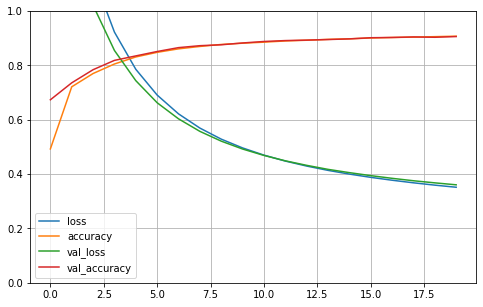

In [46]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [47]:
test_result = model.predict(X_test_array)

In [48]:
test_result = np.array(pd.DataFrame(test_result).idxmax(axis=1))

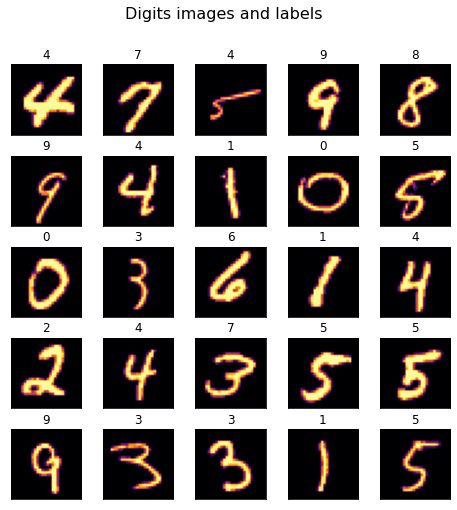

In [49]:
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, X_test.shape[0])
    ax[i].imshow(np.array(X_test.iloc[sample_n]).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(test_result[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)

In [50]:
predicted_data = pd.DataFrame({
    'ImageId': X_test.index+1,
    'Label': test_result
})

In [51]:
predicted_data

,ImageId,Label
0,39225,4
1,4225,2
2,40692,6
3,12931,3
4,12211,9
...,...,...
4195,12269,4
4196,9622,3
4197,16021,0
4198,28599,0


In [52]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test_array, y_test)
print("test loss, test acc:", results)

Evaluate on test data
132/132 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.8933
test loss, test acc: [0.3722969591617584, 0.8933333158493042]


<hr style="border:2px solid gray"> </hr>

#### 2.3) Sequential 3: Deep model

In [53]:
model = Sequential()

In [54]:
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(96, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 96)                12384     
                                                                 
 dense_6 (Dense)             (None, 64)                6208      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)               

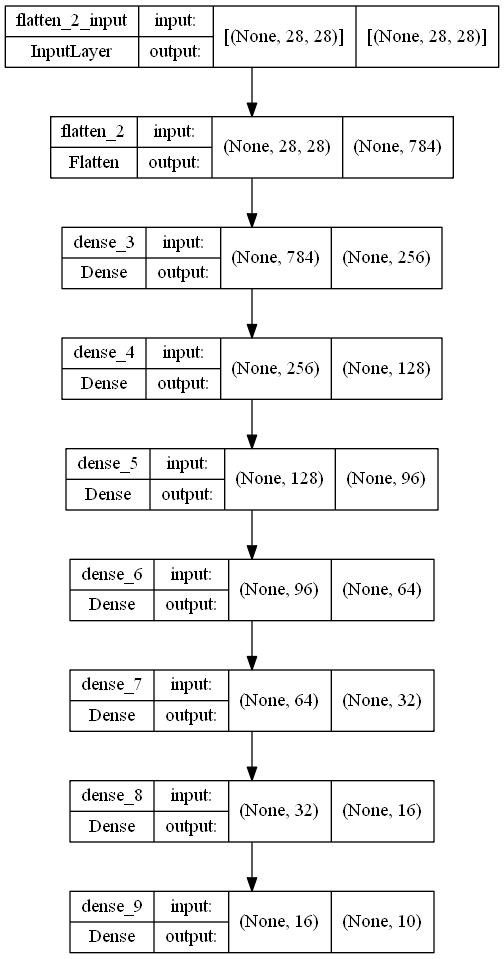

In [56]:
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [57]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [58]:
h = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1050/1050 [==============================] - 3s 3ms/step - loss: 1.2705 - accuracy: 0.5605 - val_loss: 0.6013 - val_accuracy: 0.8160
Epoch 2/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3721 - accuracy: 0.8913 - val_loss: 0.3115 - val_accuracy: 0.9102
Epoch 3/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2501 - accuracy: 0.9263 - val_loss: 0.2210 - val_accuracy: 0.9357
Epoch 4/20
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1915 - accuracy: 0.9439 - val_loss: 0.2068 - val_accuracy: 0.9383
Epoch 5/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1526 - accuracy: 0.9543 - val_loss: 0.2304 - val_accuracy: 0.9321
Epoch 6/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1259 - accuracy: 0.9621 - val_loss: 0.1496 - val_accuracy: 0.9567
Epoch 7/20
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1047 - accuracy: 0.9692 - val_loss: 0.1338 - val_accuracy:

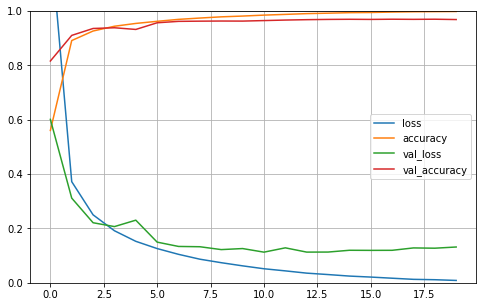

In [59]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [60]:
test_result = model.predict(X_test_array)

In [61]:
test_result = np.array(pd.DataFrame(test_result).idxmax(axis=1))

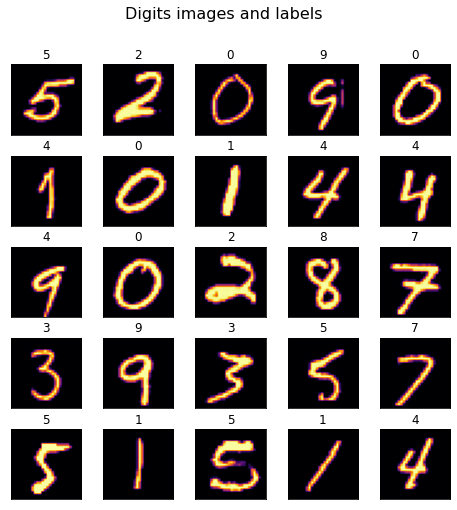

In [62]:
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, X_test.shape[0])
    ax[i].imshow(np.array(X_test.iloc[sample_n]).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(test_result[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)

In [63]:
predicted_data = pd.DataFrame({
    'ImageId': X_test.index+1,
    'Label': test_result
})

In [64]:
predicted_data

,ImageId,Label
0,39225,4
1,4225,2
2,40692,6
3,12931,3
4,12211,9
...,...,...
4195,12269,4
4196,9622,3
4197,16021,0
4198,28599,0


In [65]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test_array, y_test)
print("test loss, test acc:", results)

Evaluate on test data
132/132 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.9643
test loss, test acc: [0.166250079870224, 0.9642857313156128]


<hr style="border:2px solid gray"> </hr>

## 3) Functional: Complex deep model

In [66]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Model

In [67]:
input_ = Input(shape=[28, 28])

flatten = Flatten(input_shape=[28, 28])(input_)
hidden1 = Dense(256, activation="relu")(flatten)
hidden2 = Dense(128, activation='relu')(hidden1)
hidden3 = Dense(64, activation='relu')(hidden2)
hidden4 = Dense(32, activation='relu')(hidden3)
# reshap = Reshape((28, 28))(hidden4)
# concat_ = Concatenate()([input_, reshap])
# flatten2 = Flatten(input_shape=[28, 28])(concat_)
output = Dense(10, activation='softmax')(flatten)

model = Model(inputs=[input_], outputs=[output] )

In [68]:
input_ = Input(shape=[28, 28])

flatten = Flatten(input_shape=[28, 28])(input_)

hidden1 = Dense(256, activation="relu")(flatten)
hidden2 = Dense(128, activation='relu')(hidden1)
hidden3 = Dense(64, activation='relu')(hidden2)
hidden4 = Dense(32, activation='relu')(hidden3)

hidden5 = Dense(256, activation="sigmoid")(flatten)
hidden6 = Dense(128, activation='sigmoid')(hidden5)
hidden7 = Dense(32, activation='sigmoid')(hidden6)

concat_ = Concatenate()([hidden4, hidden7])
hidden8 = Dense(24, activation="relu")(concat_)
hidden9 = Dense(16, activation="relu")(hidden8)

output = Dense(10, activation='softmax')(hidden9)

model = Model(inputs=[input_], outputs=[output] )

In [69]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_4 (Flatten)            (None, 784)          0           ['input_2[0][0]']                
                                                                                                  
 dense_15 (Dense)               (None, 256)          200960      ['flatten_4[0][0]']              
                                                                                                  
 dense_16 (Dense)               (None, 128)          32896       ['dense_15[0][0]']               
                                                                                            

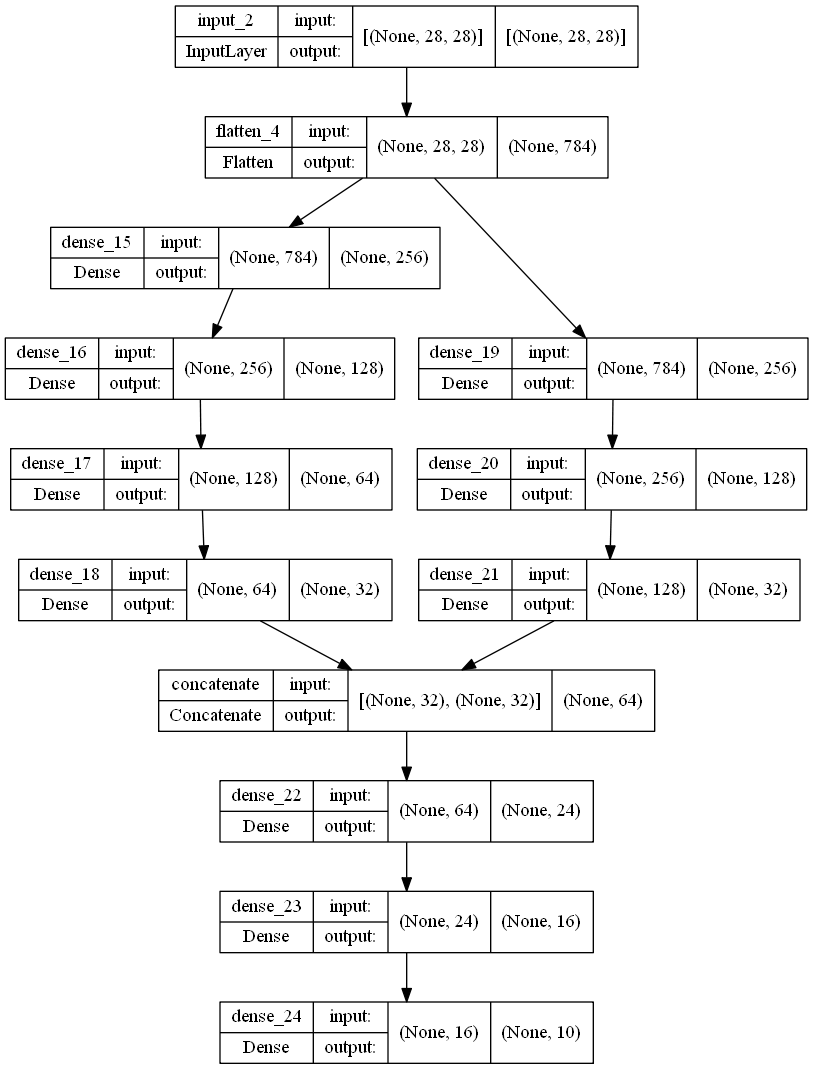

In [70]:
plot_model(model, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

In [71]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [72]:
h = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
1050/1050 [==============================] - 4s 3ms/step - loss: 1.4202 - accuracy: 0.5268 - val_loss: 0.5306 - val_accuracy: 0.8414
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.4028 - accuracy: 0.8802 - val_loss: 0.3000 - val_accuracy: 0.9131
Epoch 3/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2580 - accuracy: 0.9240 - val_loss: 0.2291 - val_accuracy: 0.9374
Epoch 4/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1936 - accuracy: 0.9423 - val_loss: 0.1883 - val_accuracy: 0.9469
Epoch 5/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1536 - accuracy: 0.9547 - val_loss: 0.1678 - val_accuracy: 0.9531
Epoch 6/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1253 - accuracy: 0.9624 - val_loss: 0.1425 - val_accuracy: 0.9581
Epoch 7/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1041 - accuracy: 0.9691 - val_loss: 0.1350 - val_accuracy:

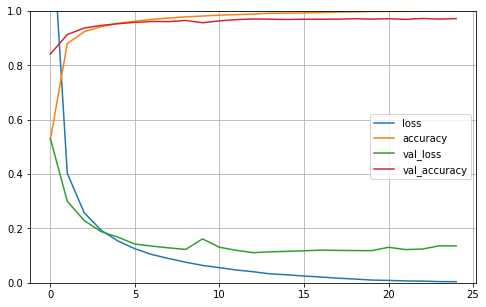

In [73]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [74]:
test_result = model.predict(X_test_array)

In [75]:
test_result = np.array(pd.DataFrame(test_result).idxmax(axis=1))

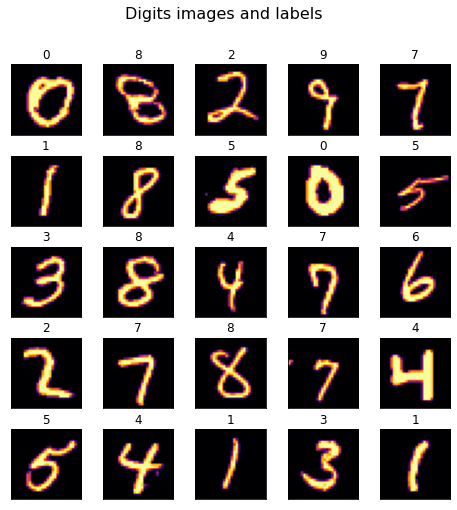

In [76]:
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, X_test.shape[0])
    ax[i].imshow(np.array(X_test.iloc[sample_n]).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(test_result[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)

In [77]:
predicted_data = pd.DataFrame({
    'ImageId': X_test.index+1,
    'Label': test_result
})

In [78]:
predicted_data

,ImageId,Label
0,39225,4
1,4225,2
2,40692,6
3,12931,3
4,12211,9
...,...,...
4195,12269,4
4196,9622,3
4197,16021,0
4198,28599,0


In [79]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test_array, y_test)
print("test loss, test acc:", results)

Evaluate on test data
132/132 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.9679
test loss, test acc: [0.14874140918254852, 0.9678571224212646]
